In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
np.random.seed(1234)

In [2]:
def myscatter(data, assignment):
    sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)',
                    hue=assignment,
                    palette=sns.color_palette('Set1', as_cmap=True))

In [4]:
data = pd.read_csv('mall/Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
data = data.set_index('CustomerID')

In [7]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

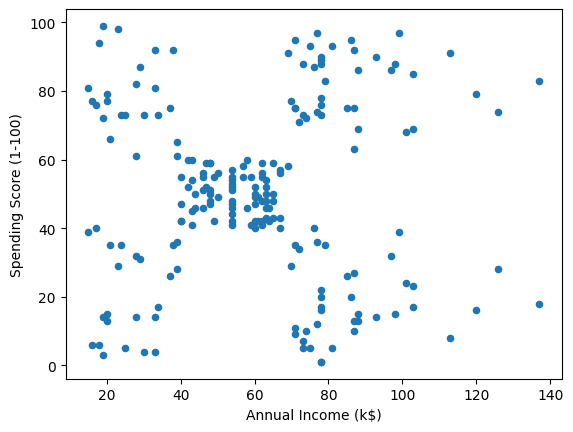

In [9]:
X.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)')

In [11]:
kmeans = cluster.KMeans(n_clusters=5, init='random')

In [12]:
kmeans.fit(X)

KMeans(init='random', n_clusters=5)

In [13]:
kmeans.labels_

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4,
       3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 0, 1, 4, 1, 0, 1, 0, 1,
       4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

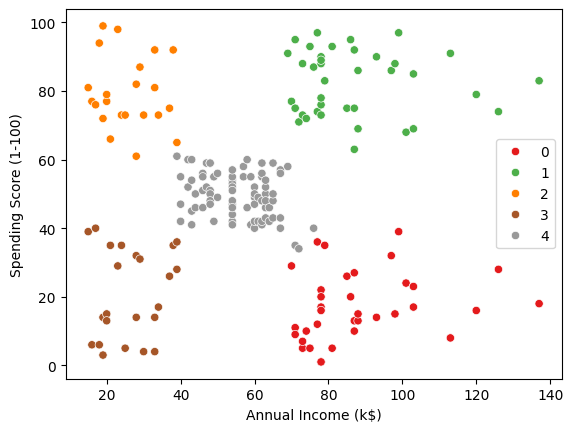

In [14]:
myscatter(X, kmeans.labels_)

In [18]:
kmeanspp = cluster.KMeans(n_clusters=5, init='k-means++', verbose=1).fit(X)

Initialization complete
Iteration 0, inertia 67631.0.
Iteration 1, inertia 44836.07031040994.
Iteration 2, inertia 44472.33192121094.
Iteration 3, inertia 44448.45544793371.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 72273.0.
Iteration 1, inertia 45204.32608877895.
Iteration 2, inertia 44586.43912798357.
Iteration 3, inertia 44448.45544793371.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 85496.0.
Iteration 1, inertia 48136.12891790953.
Iteration 2, inertia 44690.08574904765.
Iteration 3, inertia 44474.83570937372.
Iteration 4, inertia 44448.45544793371.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 94094.0.
Iteration 1, inertia 73875.06756341636.
Iteration 2, inertia 62397.20353773277.
Iteration 3, inertia 52327.157427862774.
Iteration 4, inertia 45819.34109105589.
Iteration 5, inertia 44556.60128198886.
Iteration 6, inertia 44448.45544793371.
Conve

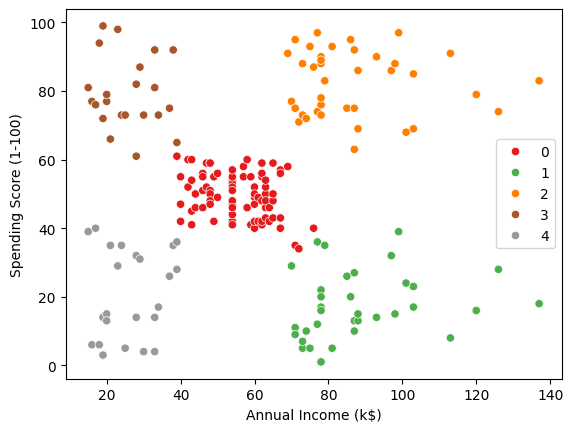

In [19]:
myscatter(X, kmeanspp.labels_)

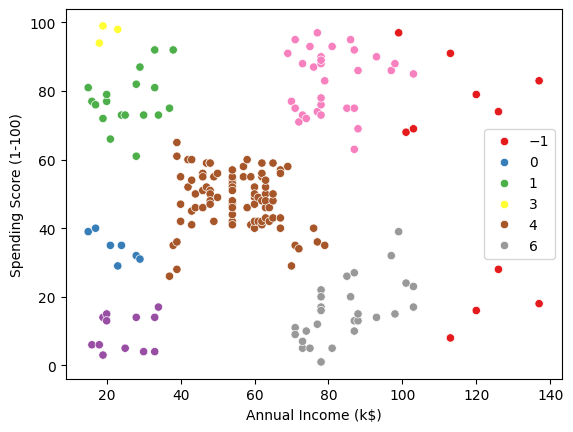

In [21]:
dbscan = cluster.DBSCAN(eps=9, min_samples=3).fit(X)
myscatter(X, dbscan.labels_)

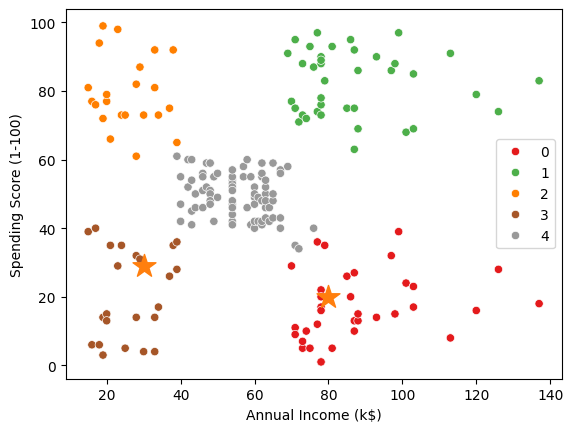

In [25]:
# adding new data
Xnew = np.array([[30, 29], [80, 20]])
myscatter(X, kmeans.labels_)
plt.scatter(Xnew[:, 0], Xnew[:, 1], marker='*', s=300)

In [26]:
kmeans.predict(Xnew)

/Users/sudeepy/.local/share/virtualenvs/berkeley_ai_ml-A8BYuT1H/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3, 0], dtype=int32)